In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import Imputer ,StandardScaler , LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection  import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
import operator
import random
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn import linear_model as lm 
from sklearn.tree import DecisionTreeClassifier as dt
import pickle

%matplotlib inline

In [2]:
df = pd.read_excel ('Base Hackaton.xlsx')

In [3]:
df.columns.values

array(['numero_sinistre', 'Date_entree_RGA', 'Immatriculation', 'VIN',
       'Marque', 'Modele', 'DMC', 'Piece', 'Statut',
       'Date_Reception_devis', 'Prix_Piece',
       'TOT reparation( pièce+ main œuvr', 'Nombre_heure_reparation',
       'TYPE_SINISTRE', 'annee_survenance', 'reglement_tot',
       'reserve_tot', 'reglement_mat', 'reglement_crp', 'reserve_mat',
       'reserve_crp', 'NUM_POLICE', 'nbre_sin_tot (mat+crp)',
       'nbre_sin_mat', 'nbre_sin_crp', 'MOIS', 'ANNEE', 'AGENCE',
       'CODE_PRODUIT', 'PRODUIT', 'TYPE_PACK', 'TYPE_POLICE',
       'DATE_EFFET_POLICE', 'DATE_EFFET', 'DATE_ECHEANCE',
       'TACITE_RECONDUCTION', 'FRACTIONNEMENT', 'ETAT_POLICE',
       'DATE_RESILIATION', 'TYPE_CLIENT', 'SOUS_TYPE_CLIENT',
       'TYPE_IDENTIFIANT', 'SEXE', 'ETAT_CIVILE', 'PROFESSION',
       'SECTEUR_ACTIVITE', 'VIP', 'SITUATION_ASSURE', 'TEL',
       'DATE_NAISSANCE', 'ADRESSE', 'GOUVERNORAT', 'VILLE',
       'CODE_POSTAL_VILLE', 'NUM_PERMIS_SOUSC', 'DATE_OBTENT_PERMIS',


#### On sépare les features en numeric_features et text_features

In [4]:
numeric_features=df._get_numeric_data().columns.values.tolist()

In [5]:
text_features=df.columns.values.tolist()
text_features=[i for i in text_features if i not in numeric_features]
text_features.remove("flag_Fraude")

In [6]:
categorical_features = text_features
categorical_features.remove("numero_sinistre")

#### Supression des valeurs nulles pour numeric_features

In [7]:
numeric_features

['Prix_Piece',
 'TOT reparation( pièce+ main œuvr',
 'Nombre_heure_reparation',
 'annee_survenance',
 'reglement_tot',
 'reserve_tot',
 'reglement_mat',
 'reglement_crp',
 'reserve_mat',
 'reserve_crp',
 'nbre_sin_tot (mat+crp)',
 'nbre_sin_mat',
 'nbre_sin_crp',
 'MOIS',
 'ANNEE',
 'AGENCE',
 'CODE_PRODUIT',
 'TEL',
 'CODE_POSTAL_VILLE',
 'PUISSANCE',
 'USAGEE',
 'CLASSE_BM',
 'COEFFICIENT',
 'NBR_PLACE',
 'CYLINDRE',
 'POID_VIDE',
 'PP_TAC',
 'CHARGE_UTILE',
 'VALEUR_NEUF',
 'VALEUR_VENALE',
 'PRIME_ANNUELLE']

In [8]:
count = pd.DataFrame({'zero count':[0]*len(numeric_features),'null count':[0]*len(numeric_features)},index = numeric_features)

for element in numeric_features:
    count.loc[element,'zero count'] = sum(np.array(df[element])==0)
    count.loc[element,'null count'] = df[element].isnull().sum()
print(count)

                                  zero count  null count
Prix_Piece                                 0        5390
TOT reparation( pièce+ main œuvr           0           0
Nombre_heure_reparation                    6           0
annee_survenance                           0           0
reglement_tot                           3316           0
reserve_tot                            13458           0
reglement_mat                           3316           0
reglement_crp                              0       14578
reserve_mat                            13458           0
reserve_crp                                0       14578
nbre_sin_tot (mat+crp)                     0           0
nbre_sin_mat                               0           0
nbre_sin_crp                               0       14578
MOIS                                       0          78
ANNEE                                      0          78
AGENCE                                     0          78
CODE_PRODUIT                   

In [9]:
df.drop(["reserve_crp","reglement_crp","reglement_mat","reserve_mat","reserve_tot","nbre_sin_crp","nbre_sin_tot (mat+crp)","TEL",
         "CYLINDRE","POID_VIDE","PP_TAC","CHARGE_UTILE","MOIS","CODE_POSTAL_VILLE","CLASSE_BM","ANNEE","AGENCE"], inplace=True, axis=1)
for el in ["reserve_crp","reglement_crp","reglement_mat","reserve_mat","reserve_tot","nbre_sin_crp","TEL","CYLINDRE","POID_VIDE",
           "nbre_sin_tot (mat+crp)","PP_TAC","CHARGE_UTILE","MOIS","CODE_POSTAL_VILLE","CLASSE_BM","ANNEE","AGENCE"]:
    if el in numeric_features: numeric_features.remove(el)

In [10]:
df["Prix_Piece"]= df["Prix_Piece"].replace(np.nan,0 ).copy()

In [11]:
df = df[np.isfinite(df['CODE_PRODUIT'])]

In [12]:
imputer = Imputer(missing_values=np.nan ,strategy='most_frequent',axis =0)
imputer = imputer.fit(df[['PUISSANCE','USAGEE','COEFFICIENT','NBR_PLACE','PRIME_ANNUELLE']])
df[['PUISSANCE','USAGEE','COEFFICIENT','NBR_PLACE','PRIME_ANNUELLE']] = imputer.transform(df[['PUISSANCE','USAGEE','COEFFICIENT','NBR_PLACE','PRIME_ANNUELLE']])


C:\Users\Lilia\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [13]:
count = pd.DataFrame({'zero count':[0]*len(numeric_features),'null count':[0]*len(numeric_features)},index = numeric_features)

for element in numeric_features:
    count.loc[element,'zero count'] = sum(np.array(df[element])==0)
    count.loc[element,'null count'] = df[element].isnull().sum()
print(count)

                                  zero count  null count
Prix_Piece                              5364           0
TOT reparation( pièce+ main œuvr           0           0
Nombre_heure_reparation                    6           0
annee_survenance                           0           0
reglement_tot                           3293           0
nbre_sin_mat                               0           0
CODE_PRODUIT                               0           0
PUISSANCE                                  0           0
USAGEE                                     0           0
COEFFICIENT                              171           0
NBR_PLACE                                  0           0
VALEUR_NEUF                               13         776
VALEUR_VENALE                              0           0
PRIME_ANNUELLE                             0           0


#### Supression des valeurs nulles et non significatives pour text_features

In [14]:
df[text_features].isnull().sum() 

Date_entree_RGA             0
Immatriculation             0
VIN                         0
Marque                      0
Modele                      0
DMC                         0
Piece                       0
Statut                      0
Date_Reception_devis        0
TYPE_SINISTRE               0
NUM_POLICE                  0
PRODUIT                     0
TYPE_PACK                4543
TYPE_POLICE                 0
DATE_EFFET_POLICE           0
DATE_EFFET                  0
DATE_ECHEANCE               0
TACITE_RECONDUCTION         0
FRACTIONNEMENT            502
ETAT_POLICE                 0
DATE_RESILIATION        10071
TYPE_CLIENT                 0
SOUS_TYPE_CLIENT           13
TYPE_IDENTIFIANT            0
SEXE                     2207
ETAT_CIVILE              2642
PROFESSION               2207
SECTEUR_ACTIVITE        12293
VIP                     12590
SITUATION_ASSURE            0
DATE_NAISSANCE           2207
ADRESSE                   155
GOUVERNORAT               810
VILLE     

In [15]:
df.drop(["Date_entree_RGA","DATE_RESILIATION","Immatriculation","VIN","Modele","DMC","Date_Reception_devis","NUM_POLICE", "TYPE_PACK",
         "DATE_RESILIATION","SECTEUR_ACTIVITE","VIP","CONVENTION","PROFESSION","SITUATION_ASSURE","DATE_NAISSANCE","ADRESSE",
         "GOUVERNORAT","VILLE","NUM_PERMIS_SOUSC","PROFESSION","TYPE_IMMATRICULATION","DATE_M_CIRC","USAGE_DU_VEHICULE","TYPE_IDENTIFIANT",
        "FRACTIONNEMENT","DATE_EFFET_POLICE","DATE_EFFET","DATE_ECHEANCE","DATE_OBTENT_PERMIS","SEXE","ETAT_CIVILE","Nom_agence"], 
        inplace=True, axis=1)
for el in ["Date_entree_RGA","DATE_RESILIATION","Immatriculation","VIN","Modele","DMC","Date_Reception_devis","NUM_POLICE", "TYPE_PACK",
         "DATE_RESILIATION","SECTEUR_ACTIVITE","VIP","CONVENTION","PROFESSION","SITUATION_ASSURE","DATE_NAISSANCE","ADRESSE",
         "GOUVERNORAT","VILLE","NUM_PERMIS_SOUSC","PROFESSION","TYPE_IMMATRICULATION","DATE_M_CIRC","USAGE_DU_VEHICULE","TYPE_IDENTIFIANT",
          "FRACTIONNEMENT","DATE_EFFET_POLICE","DATE_EFFET","DATE_ECHEANCE","DATE_OBTENT_PERMIS","SEXE","ETAT_CIVILE","Nom_agence"]:
    if el in text_features: text_features.remove(el)


In [16]:
df = df.dropna()

#### Data preparation pour numeric_features

In [17]:
scl=StandardScaler()
df[numeric_features]=scl.fit_transform(df[numeric_features])

C:\Users\Lilia\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Lilia\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [18]:
df.isnull().sum() 

numero_sinistre                     0
Marque                              0
Piece                               0
Statut                              0
Prix_Piece                          0
TOT reparation( pièce+ main œuvr    0
Nombre_heure_reparation             0
TYPE_SINISTRE                       0
annee_survenance                    0
reglement_tot                       0
nbre_sin_mat                        0
CODE_PRODUIT                        0
PRODUIT                             0
TYPE_POLICE                         0
TACITE_RECONDUCTION                 0
ETAT_POLICE                         0
TYPE_CLIENT                         0
SOUS_TYPE_CLIENT                    0
PUISSANCE                           0
ENERGIE                             0
USAGEE                              0
COEFFICIENT                         0
NBR_PLACE                           0
VALEUR_NEUF                         0
VALEUR_VENALE                       0
PRIME_ANNUELLE                      0
flag_Fraude 

In [19]:
df['flag_Fraude'] = df['flag_Fraude'].str.upper()

In [20]:
df['Fraude'] = (df.flag_Fraude.isin (['FRAUDE'])).astype(int)

In [21]:
df.Fraude.unique()

array([0, 1], dtype=int64)

In [22]:
df.drop(["flag_Fraude"], inplace=True, axis=1)
if "flag_Fraude" in text_features: text_features.remove("flag_Fraude")

#### On sépare les données

In [23]:
x_train, x_test, y_train, y_test = train_test_split(df.loc[:,df.columns.values], df['Fraude'],test_size=0.25, random_state=0)

#### Data cleaning pour categorical_features

In [24]:
columns = df[categorical_features]

In [25]:
for feat in categorical_features:
    x_train=pd.concat([x_train, pd.get_dummies(x_train[feat], prefix=feat, dummy_na=True)],axis=1)
    x_test=pd.concat([x_test, pd.get_dummies(x_test[feat], prefix=feat, dummy_na=True)],axis=1)
print(x_train.columns.values)

['numero_sinistre' 'Marque' 'Piece' ...
 'type_dossier_afin_Recours RC etranger'
 'type_dossier_afin_Recours connexe' 'type_dossier_afin_nan']


In [26]:
cat_dummies=[]
cat_dummies=[i for i in x_train.columns.values.tolist() if i not in numeric_features]
cat_dummies=[i for i in cat_dummies if i not in text_features]
cat_dummies.remove("Fraude")
cat_dummies.remove("numero_sinistre")

In [27]:
correl={}
for f in cat_dummies:
    correl[f]=pearsonr(x_train[f], y_train)
sorted_cor = sorted(correl.items(), key=operator.itemgetter(1), reverse=True)

print (sorted_cor[0:15])
print("")
print (sorted_cor[-15:])

C:\Users\Lilia\Anaconda3\lib\site-packages\scipy\stats\stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


[('Marque_KIA', (0.08997448053283613, 6.170075867784805e-20)), ('Piece_poignee porte AV', (0.06517190129349035, 3.715656503129416e-11)), ('Piece_Airbag latéral G', (0.057283938478019145, 6.138055978057373e-09)), ('Piece_Arrettoire  de porte', (0.057283938478019145, 6.138055978057373e-09)), ('Piece_Enjoliveur aile Av D', (0.05728393847801914, 6.138055978057373e-09)), ('Piece_traverse sous pare chocs AR', (0.057283938478019124, 6.138055978057373e-09)), ('Piece_Appareil leve vitre Ar D', (0.05728393847801912, 6.138055978057373e-09)), ('Piece_Ingridient de Peinture', (0.05728393847801912, 6.138055978057373e-09)), ('Piece_Moulure pare chocs AR', (0.05728393847801912, 6.138055978057373e-09)), ('Marque_FORD', (0.054913511961879685, 2.5177487210839058e-08)), ('Marque_VOLKSWAGEN', (0.045092054315790754, 4.777319297973076e-06)), ('Marque_BMW', (0.04376556101169228, 9.010950026876515e-06)), ('Piece_Enjoliveur aile AVG', (0.03930723866572009, 6.691070994631702e-05)), ('Piece_Amortisseurs AV', (0.0

In [28]:
corFeat = ['Marque_KIA', 'Piece_poignee porte AV', 'Piece_Airbag latéral G', 'Piece_Arrettoire  de porte',
 'Piece_Enjoliveur aile Av D', 'Piece_traverse sous pare chocs AR', 'Piece_Appareil leve vitre Ar D',
 'Piece_Ingridient de Peinture', 'Piece_Moulure pare chocs AR', 'Marque_FORD', 'Marque_VOLKSWAGEN', 'Marque_BMW', 'Marque_CITROEN',
 'Marque_PEUGEOT', 'Statut_Réparée', 'Statut_Remplacée', 'PRODUIT_Individuel à la carte', 'type_dossier_afin_Autres dommages',
 'Piece_feu de stop', 'Piece_feu de jour', 'Piece_lave phare G', 'Piece_montant pavillon DR', 'Piece_catadioptre D',
 'Piece_porte reservoir', 'Piece_Porte ARD', 'TYPE_CLIENT_Personne physique', 'SOUS_TYPE_CLIENT_Particulier', 'type_dossier_afin_Recours IDA',
 'SOUS_TYPE_CLIENT_Société', 'TYPE_CLIENT_Personne morale', 'PRODUIT_Trik Esslama']

#### Data reduction pour numeric_features

In [29]:
correl={}
for f in numeric_features:
    correl[f]=pearsonr(x_train[f], y_train)
sorted_cor = sorted(correl.items(), key=operator.itemgetter(1), reverse=True)
print (sorted_cor)

[('nbre_sin_mat', (0.24282531919526, 6.799719517323146e-138)), ('VALEUR_VENALE', (0.0735284152133901, 8.307330322740539e-14)), ('VALEUR_NEUF', (0.066492140775804, 1.4856619908157737e-11)), ('NBR_PLACE', (0.05496298605531896, 2.4460793162376302e-08)), ('PRIME_ANNUELLE', (0.04177145304880902, 2.2635084392388937e-05)), ('annee_survenance', (0.0314463198576959, 0.0014265770629116764)), ('PUISSANCE', (0.019315822088483998, 0.05015167869911417)), ('Prix_Piece', (-0.0022023038873319, 0.8233035606637007)), ('COEFFICIENT', (-0.01898260038878286, 0.05424531890267338)), ('CODE_PRODUIT', (-0.028170424512925632, 0.004278745248017205)), ('reglement_tot', (-0.0397859228145283, 5.446203176796117e-05)), ('Nombre_heure_reparation', (-0.04576557647246187, 3.438313634906773e-06)), ('TOT reparation( pièce+ main œuvr', (-0.07505913870945412, 2.5131202397674798e-14)), ('USAGEE', (-0.07615241463081175, 1.0542473127884379e-14))]


In [30]:
def corrmap(features, title):
    sns.set(context="paper", font="monospace")
    corrmat = x_train[features].corr()
    f, ax = plt.subplots(figsize=(12, 9))
    plt.title(title)
    sns.heatmap(corrmat, vmax=.8, square=True)
    

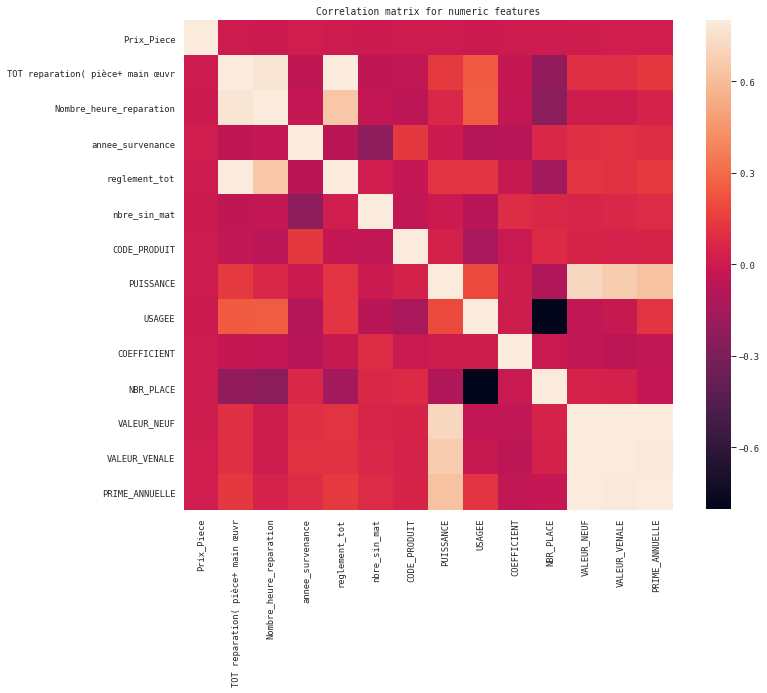

In [31]:
corrmap(numeric_features,"Correlation matrix for numeric features")

In [32]:
cor = []
for f in sorted_cor:
    if (abs(f[1][0])>0.04):
        cor.append(f[0])

In [33]:
for i in numeric_features:
    if i not in cor:
        numeric_features.remove(i)

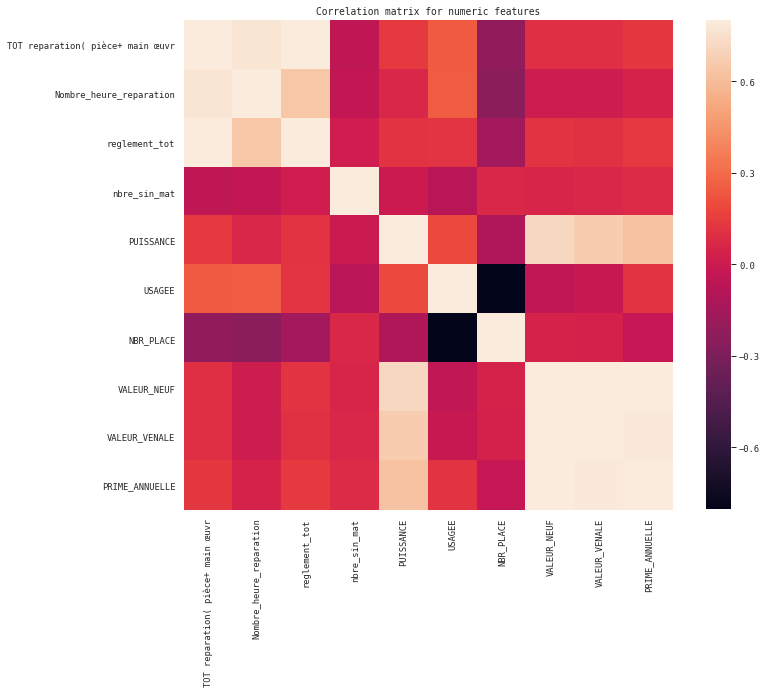

In [34]:
corrmap(numeric_features,"Correlation matrix for numeric features")

In [35]:
df.drop(["VALEUR_NEUF","VALEUR_VENALE","PRIME_ANNUELLE","USAGEE"],inplace=True, axis=1)
for el in ["VALEUR_NEUF","VALEUR_VENALE","PRIME_ANNUELLE","USAGEE"]:
    if el in numeric_features: numeric_features.remove(el)

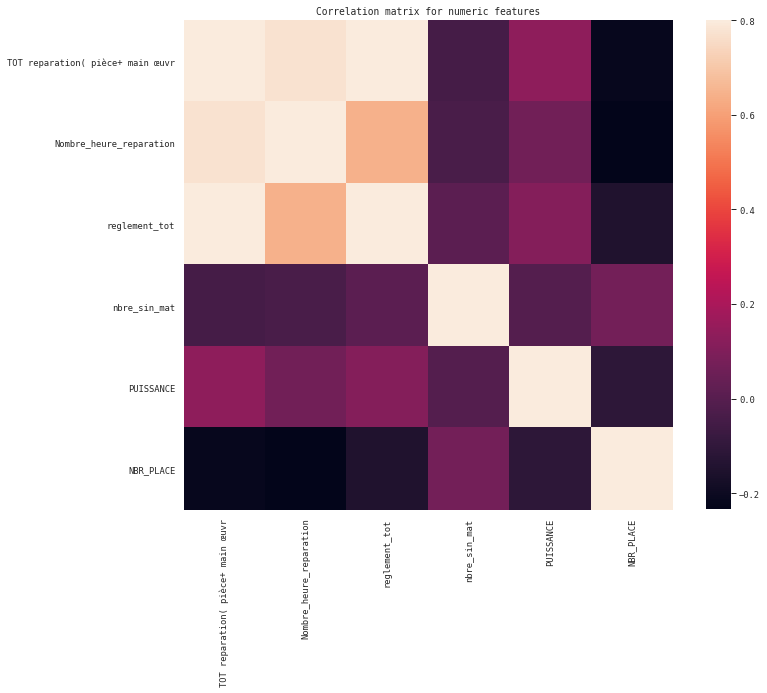

In [36]:
corrmap(numeric_features,"Correlation matrix for numeric features")

In [37]:
df.drop(["Nombre_heure_reparation","reglement_tot"],inplace=True, axis=1)
for el in ["Nombre_heure_reparation","reglement_tot"]:
    if el in numeric_features: numeric_features.remove(el)

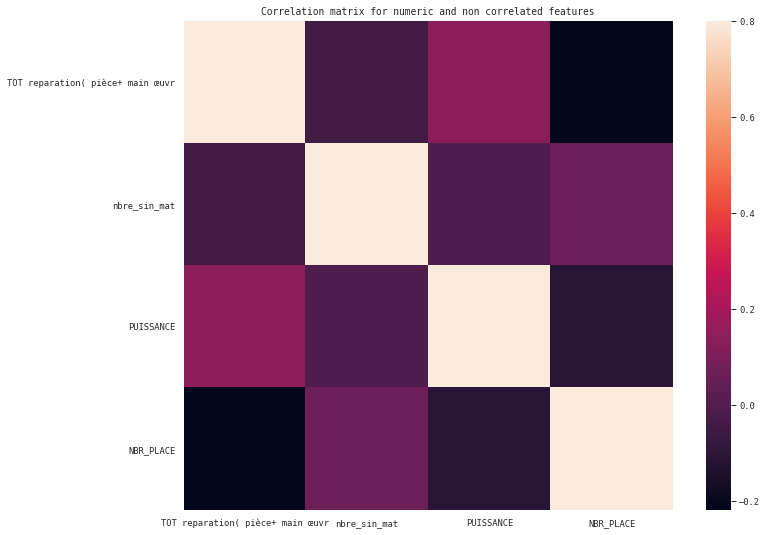

In [38]:
corrmap(numeric_features,"Correlation matrix for numeric and non correlated features")

In [39]:
numeric_features 

['TOT reparation( pièce+ main œuvr', 'nbre_sin_mat', 'PUISSANCE', 'NBR_PLACE']

In [40]:
for el in numeric_features:
    corFeat.append(el)

In [41]:
corFeat

['Marque_KIA',
 'Piece_poignee porte AV',
 'Piece_Airbag latéral G',
 'Piece_Arrettoire  de porte',
 'Piece_Enjoliveur aile Av D',
 'Piece_traverse sous pare chocs AR',
 'Piece_Appareil leve vitre Ar D',
 'Piece_Ingridient de Peinture',
 'Piece_Moulure pare chocs AR',
 'Marque_FORD',
 'Marque_VOLKSWAGEN',
 'Marque_BMW',
 'Marque_CITROEN',
 'Marque_PEUGEOT',
 'Statut_Réparée',
 'Statut_Remplacée',
 'PRODUIT_Individuel à la carte',
 'type_dossier_afin_Autres dommages',
 'Piece_feu de stop',
 'Piece_feu de jour',
 'Piece_lave phare G',
 'Piece_montant pavillon DR',
 'Piece_catadioptre D',
 'Piece_porte reservoir',
 'Piece_Porte ARD',
 'TYPE_CLIENT_Personne physique',
 'SOUS_TYPE_CLIENT_Particulier',
 'type_dossier_afin_Recours IDA',
 'SOUS_TYPE_CLIENT_Société',
 'TYPE_CLIENT_Personne morale',
 'PRODUIT_Trik Esslama',
 'TOT reparation( pièce+ main œuvr',
 'nbre_sin_mat',
 'PUISSANCE',
 'NBR_PLACE']

In [42]:
x_train = x_train[corFeat]

In [43]:
col=[]
col=[i for i in corFeat if i not in x_test.columns.values.tolist()]
for el in col:
    x_test[el] = 0
x_test = x_test[corFeat]

### oversampling

In [45]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
columns = x_train.columns
os_data_X,os_data_y=os.fit_sample(x_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Fraude'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of non fraudulent in oversampled data",len(os_data_y[os_data_y['Fraude']==0]))
print("Number of fraudulent",len(os_data_y[os_data_y['Fraude']==1]))
print("Proportion of non fraudulent data in oversampled data is ",len(os_data_y[os_data_y['Fraude']==0])/len(os_data_X))
print("Proportion of fraudulent data in oversampled data is ",len(os_data_y[os_data_y['Fraude']==1])/len(os_data_X))

Using TensorFlow backend.


length of oversampled data is  19974
Number of non fraudulent in oversampled data 9987
Number of fraudulent 9987
Proportion of non fraudulent data in oversampled data is  0.5
Proportion of fraudulent data in oversampled data is  0.5


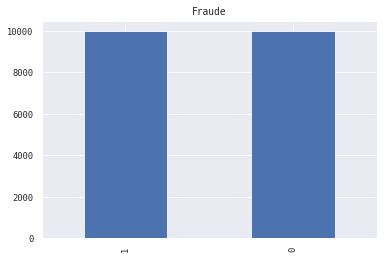

In [46]:
fig, ax = plt.subplots()
os_data_y['Fraude'].value_counts().plot(ax=ax, kind='bar',title="Fraude")

In [47]:
y_train1 = os_data_y['Fraude']
x_train1 = os_data_X

#### LogisticRegression

In [79]:
data_train_lr = x_train1.as_matrix()
data_test_lr = x_test.as_matrix()

C:\Users\Lilia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\Lilia\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [80]:
model_lr = lm.LogisticRegression()
model_lr.fit(data_train_lr, y_train1)

C:\Users\Lilia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [81]:
#Predict target for the test set
pred_model_lr = model_lr.predict(data_test_lr)

#generate class probabilities
pred_probs_model_lr = model_lr.predict_proba(data_test_lr)

In [82]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model_lr.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [83]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score,confusion_matrix

In [85]:
recall = recall_score(y_test, pred_model_lr)
f1 = f1_score(y_test, pred_model_lr)
precision = precision_score(y_test, pred_model_lr)

print("recall: %.2f%%" % (recall * 100.0))
print("f1_score: %.2f%%" % (f1 * 100.0))
print("precision_score: %.2f%%" % (precision * 100.0))

recall: 72.09%
f1_score: 15.21%
precision_score: 8.50%


In [86]:
def confmat(cm):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

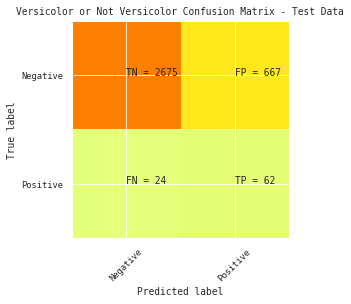

In [87]:
from sklearn.metrics import confusion_matrix
 
cm1 = confusion_matrix(y_test, pred_model_lr)

confmat(cm1)

#### Decision tree

In [88]:
data_train_dt = x_train1.as_matrix()
data_test_dt = x_test.as_matrix()

C:\Users\Lilia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\Lilia\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [89]:
model_dt = dt(criterion='entropy' , max_depth = 10)
model_dt.fit(data_train_dt, y_train1)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [90]:
#Predict target for the test set
pred_model_dt = model_dt.predict(data_test_dt)

#generate class probabilities
pred_probs_model_dt = model_dt.predict_proba(data_test_dt)

In [91]:
accuracy = model_dt.score(x_test, y_test)
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(accuracy))

Accuracy of decision tree classifier on test set: 0.86


In [92]:
recall = recall_score(y_test, pred_model_dt)
f1 = f1_score(y_test, pred_model_dt)
precision = precision_score(y_test, pred_model_dt)

print("recall: %.2f%%" % (recall * 100.0))
print("f1_score: %.2f%%" % (f1 * 100.0))
print("precision_score: %.2f%%" % (precision * 100.0))

recall: 89.53%
f1_score: 24.21%
precision_score: 14.00%


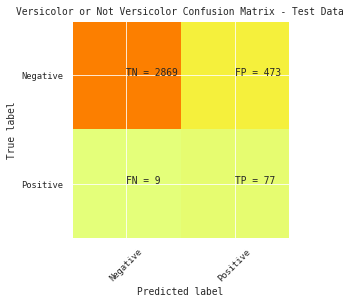

In [93]:
cm2 = confusion_matrix(y_test, pred_model_dt)
confmat(cm2)

In [94]:
pickle_out=open("model.pickle","wb")
pickle.dump(model_dt,pickle_out)
pickle_out.close()

In [95]:
pickle_out=open("accuracy.pickle","wb")
pickle.dump(accuracy,pickle_out)
pickle_out.close()